In [1]:
# import the libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import os

In [3]:
os.getcwd()

'C:\\Users\\akilm'

## Lets have a understanding of what we are dealing with here. 
- This is a sales report of a home-based retail store selling jewellery and accessories. We are going to perform Market Basket Analysis (or) Association rule on this dataset. <br>
- A little insight on the **Product type** or Collection, we are going to perform MBA on, 
    - 'nose pin, 
    - 'Tribal', 
    - 'German silver', 
    - 'Necklace',
    - 'Handmade earrings', 
    - 'Earrings', 
    - 'On sale', 
    - 'Accessories',
    - 'Fashion earrings', 
    - 'Pure silver', 
    - 'Fashion necklace'
- We shall start with our data cleaning, munching and EDA process. 

In [4]:
df=pd.read_csv('hoj.csv',encoding='latin')

In [5]:
df.head()

,Sale ID,Date,Order,Transaction type,Sale type,Sales channel,POS location,Billing country,Billing region,Billing city,...,Product,Variant,Variant SKU,Net quantity,Amount (before discount and taxes),Line item discounts,Order discount,Amount (after discounts before tax),Taxes,Amount (after discounts and taxes)
0,5.363440e+11,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,Online Store,NaN,India,Karnataka,Bengaluru,...,Peacock,NaN,NaN,1,75,0,0.0,75.0,0.0,75.0
1,5.363440e+11,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,Online Store,NaN,India,Karnataka,Bengaluru,...,Tibetan danglers -1,Green,NaN,1,525,0,0.0,525.0,0.0,525.0
2,5.363440e+11,2018-01-02T04:39:28+05:30,#HOJ1566,shipping,order,Online Store,NaN,India,Karnataka,Bengaluru,...,NaN,NaN,NaN,0,50,0,0.0,50.0,0.0,50.0
3,5.363440e+11,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,Online Store,NaN,India,Karnataka,Bengaluru,...,Ganesha full silver,NaN,NaN,1,75,0,0.0,75.0,0.0,75.0
4,5.363440e+11,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,Online Store,NaN,India,Karnataka,Bengaluru,...,Basic silver necklace,1,NaN,1,350,0,0.0,350.0,0.0,350.0


In [6]:
df['Transaction type'].unique()

array(['product', 'shipping', 'unknown'], dtype=object)

In [7]:
df=df[df['Transaction type']=='product']



In [8]:
df['Sale type'].unique()

array(['order', 'return'], dtype=object)

In [9]:
df.columns

Index(['Sale ID', 'Date', 'Order', 'Transaction type', 'Sale type',
       'Sales channel', 'POS location', 'Billing country', 'Billing region',
       'Billing city', 'Shipping country', 'Shipping region', 'Shipping city',
       'Product type', 'Product vendor', 'Product', 'Variant', 'Variant SKU',
       'Net quantity', 'Amount (before discount and taxes)',
       'Line item discounts', 'Order discount',
       'Amount (after discounts before tax)', 'Taxes',
       'Amount (after discounts and taxes)'],
      dtype='object')

In [10]:
df['Sale type'].unique()

array(['order', 'return'], dtype=object)

In [11]:
df.shape

(1572, 25)

In [12]:
# lets check for null values 
df.isnull().sum()

Sale ID                                   0
Date                                      0
Order                                     0
Transaction type                          0
Sale type                                 0
Sales channel                             0
POS location                           1572
Billing country                          14
Billing region                           82
Billing city                             26
Shipping country                         14
Shipping region                          75
Shipping city                            26
Product type                             14
Product vendor                           13
Product                                   0
Variant                                 595
Variant SKU                            1571
Net quantity                              0
Amount (before discount and taxes)        0
Line item discounts                       0
Order discount                            0
Amount (after discounts before t

In [13]:
# we dont need these many features for our findings 
data=df[['Date','Order','Transaction type','Sale type','Product type','Net quantity','Amount (after discounts and taxes)','Billing country']]

In [14]:
data.head()

,Date,Order,Transaction type,Sale type,Product type,Net quantity,Amount (after discounts and taxes),Billing country
0,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India
1,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,Tribal,1,525.0,India
3,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India
4,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,German silver,1,350.0,India
5,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India


In [15]:
data.shape


(1572, 8)

In [16]:
data.dtypes

Date                                   object
Order                                  object
Transaction type                       object
Sale type                              object
Product type                           object
Net quantity                            int64
Amount (after discounts and taxes)    float64
Billing country                        object
dtype: object

In [17]:
df=data[data['Product type'].notnull()]
df.shape

(1558, 8)

In [18]:
df.isnull().sum()

Date                                   0
Order                                  0
Transaction type                       0
Sale type                              0
Product type                           0
Net quantity                           0
Amount (after discounts and taxes)     0
Billing country                       11
dtype: int64

In [19]:
df=df[df['Billing country'].notnull()]

In [20]:
df['Sale type'].unique()

array(['order', 'return'], dtype=object)

In [21]:
df.shape

(1547, 8)

In [22]:
# taking only ordered and not returned
df=df[df['Sale type']=='order']

In [23]:
data.shape

(1572, 8)

In [24]:
data=df[data['Net quantity'].notnull()]
data.head()

D:\Anaconda Nav\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Order,Transaction type,Sale type,Product type,Net quantity,Amount (after discounts and taxes),Billing country
0,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India
1,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,Tribal,1,525.0,India
3,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India
4,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,German silver,1,350.0,India
5,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India


In [25]:
data.shape

(1465, 8)

In [26]:
data.isnull().sum()

Date                                  0
Order                                 0
Transaction type                      0
Sale type                             0
Product type                          0
Net quantity                          0
Amount (after discounts and taxes)    0
Billing country                       0
dtype: int64

In [27]:
# remvoing all null values 
data.isnull().sum()

Date                                  0
Order                                 0
Transaction type                      0
Sale type                             0
Product type                          0
Net quantity                          0
Amount (after discounts and taxes)    0
Billing country                       0
dtype: int64

In [28]:
data.shape

(1465, 8)

In [29]:
data['Transaction type'].unique()

array(['product'], dtype=object)

In [30]:
data['Product type'].unique()

array(['nose pin', 'Tribal', 'German silver', 'Necklace', 'necklace',
       'Handmade earrings', 'earrings', 'on sale', 'Accessories',
       'Fashion earrings', 'Pure silver', 'Fashion necklace', 'On sale',
       'Earrings'], dtype=object)

In [31]:
data['Billing country'].unique()

array(['India', 'United States', 'Sri Lanka', 'Switzerland', 'Singapore',
       'Canada', 'Australia', 'Saudi Arabia', 'Spain', 'Malaysia'],
      dtype=object)

In [32]:
data1=data.replace('necklace','Necklace')

In [33]:
data1=data1.replace('on sale','On sale')
data1=data1.replace('earrings','Earrings')

In [34]:
data1['Product type'].unique()

array(['nose pin', 'Tribal', 'German silver', 'Necklace',
       'Handmade earrings', 'Earrings', 'On sale', 'Accessories',
       'Fashion earrings', 'Pure silver', 'Fashion necklace'],
      dtype=object)

In [35]:
data1.head()

,Date,Order,Transaction type,Sale type,Product type,Net quantity,Amount (after discounts and taxes),Billing country
0,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India
1,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,Tribal,1,525.0,India
3,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India
4,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,German silver,1,350.0,India
5,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India


In [36]:
data1['Transaction type'].unique()

array(['product'], dtype=object)

In [37]:
print(data1.shape)
print(data.shape)

(1465, 8)
(1465, 8)


D:\Anaconda Nav\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


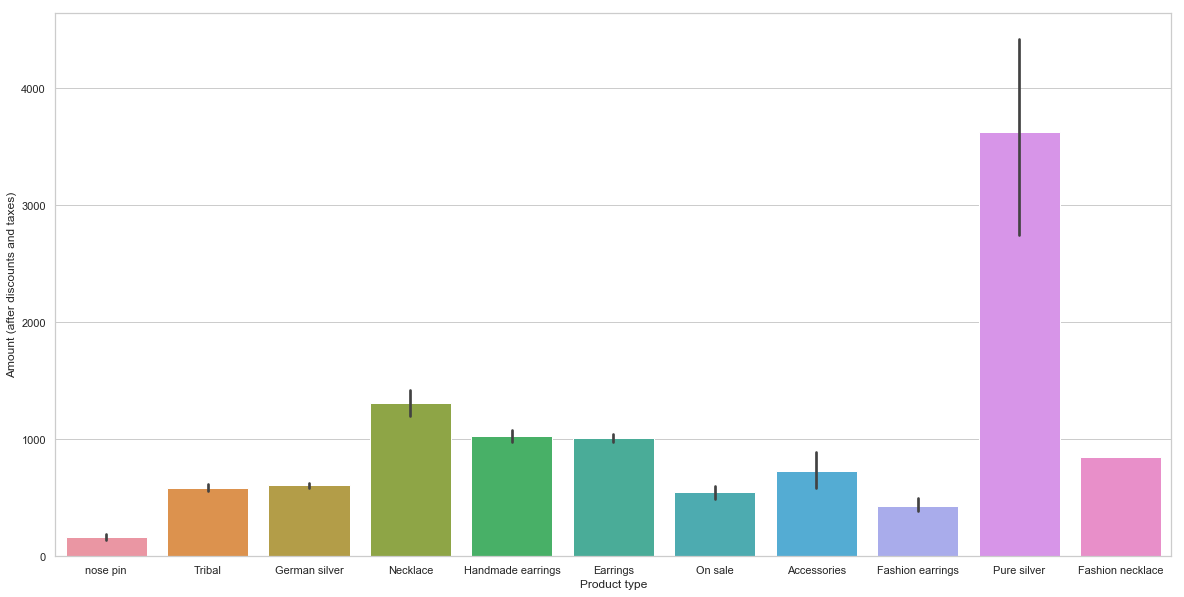

In [38]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="Product type", y="Amount (after discounts and taxes)", data=data1)

##### pure silver is the most expensive product type on the list, followed by Necklace, not fashion necklace. 

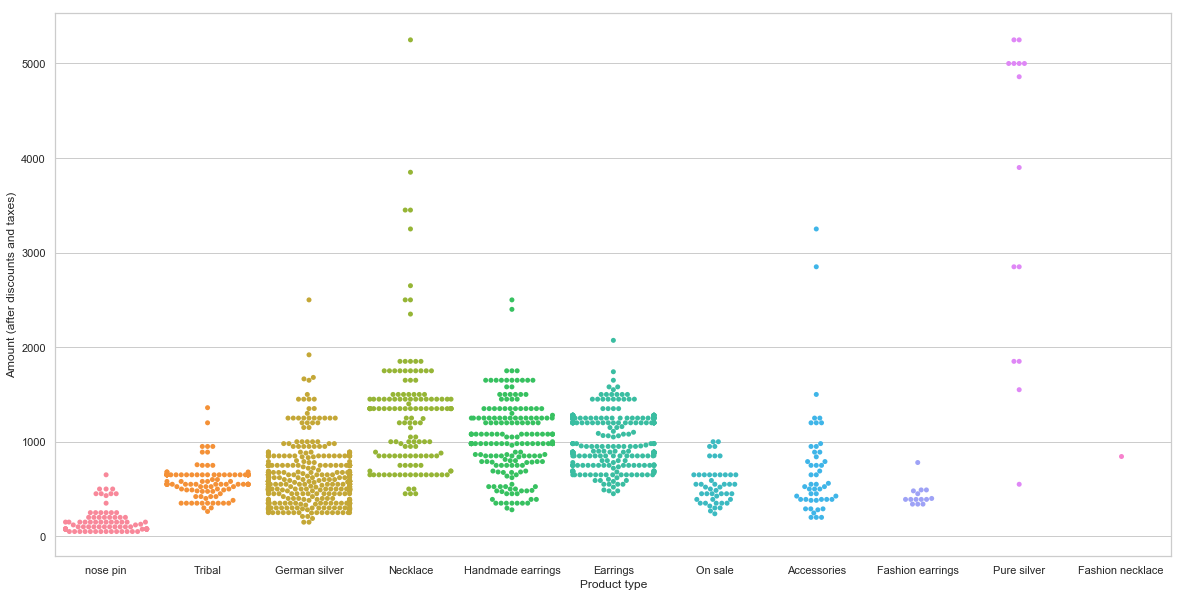

In [39]:
# Swarm plot 
plt.figure(figsize=(20,10))
sns.swarmplot(x="Product type", y="Amount (after discounts and taxes)", data=data1)

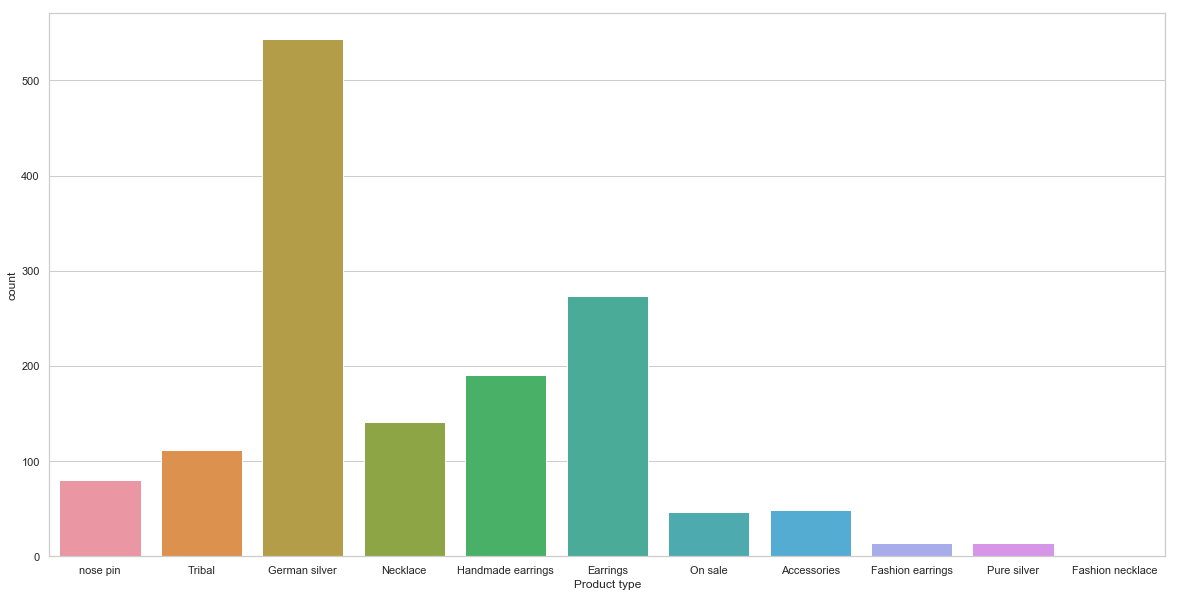

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(x="Product type",  data=data1)

##### German silver is the product type that was purchased more followed by earrings

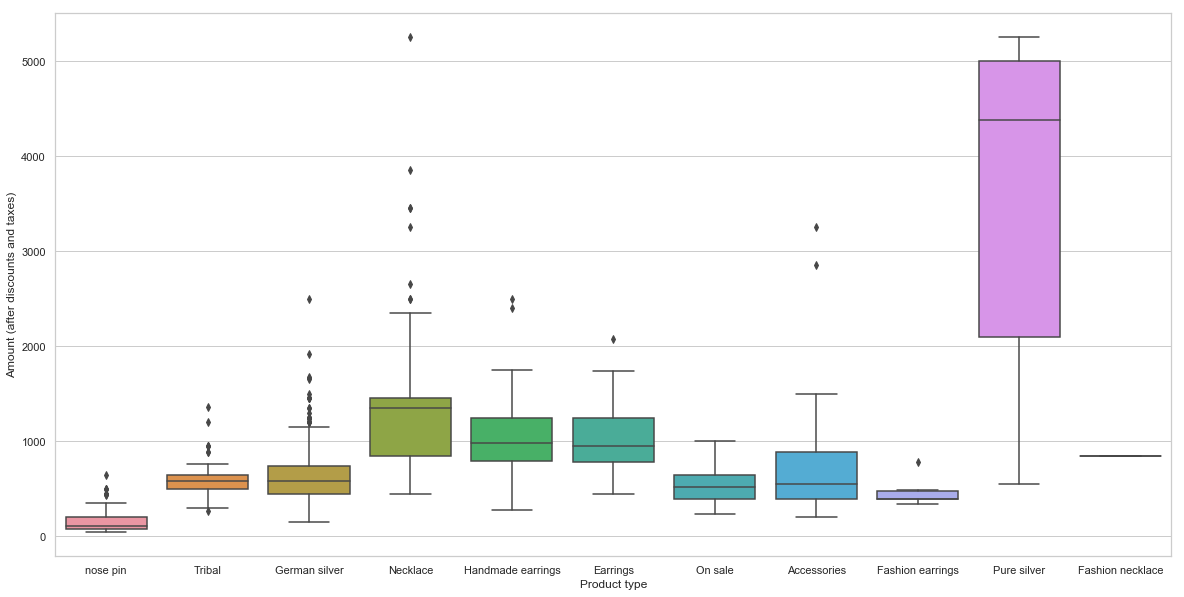

In [41]:
plt.figure(figsize=(20,10))
x = sns.boxplot(x="Product type", y="Amount (after discounts and taxes)", data=data1)

##### Surprisingly we find German silver to be bought frequently although Pure silver Generates higher revenue

In [42]:
# lets convert the date time column into separate month and year
import calendar
data1['month']=pd.DatetimeIndex(data1['Date']).month
data1['month'] = data1['month'].apply(lambda x: calendar.month_abbr[x])


In [43]:
data1.head()

,Date,Order,Transaction type,Sale type,Product type,Net quantity,Amount (after discounts and taxes),Billing country,month
0,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India,Jan
1,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,Tribal,1,525.0,India,Jan
3,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India,Jan
4,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,German silver,1,350.0,India,Jan
5,2018-01-02T04:39:28+05:30,#HOJ1566,product,order,nose pin,1,75.0,India,Jan


In [44]:
data1.dtypes

Date                                   object
Order                                  object
Transaction type                       object
Sale type                              object
Product type                           object
Net quantity                            int64
Amount (after discounts and taxes)    float64
Billing country                        object
month                                  object
dtype: object

In [45]:
data1['Date']= pd.to_datetime(data1.Date) # converting the column date into date data type 

In [46]:
data1.dtypes

Date                                  datetime64[ns]
Order                                         object
Transaction type                              object
Sale type                                     object
Product type                                  object
Net quantity                                   int64
Amount (after discounts and taxes)           float64
Billing country                               object
month                                         object
dtype: object

In [47]:
data1.head()

,Date,Order,Transaction type,Sale type,Product type,Net quantity,Amount (after discounts and taxes),Billing country,month
0,2018-01-01 23:09:28,#HOJ1566,product,order,nose pin,1,75.0,India,Jan
1,2018-01-01 23:09:28,#HOJ1566,product,order,Tribal,1,525.0,India,Jan
3,2018-01-01 23:09:28,#HOJ1566,product,order,nose pin,1,75.0,India,Jan
4,2018-01-01 23:09:28,#HOJ1566,product,order,German silver,1,350.0,India,Jan
5,2018-01-01 23:09:28,#HOJ1566,product,order,nose pin,1,75.0,India,Jan


In [48]:
# we dont need the time here. Just taking the date alone. 
data1['Date'] = [d.date() for d in data1['Date']]


In [49]:
data1.head()

,Date,Order,Transaction type,Sale type,Product type,Net quantity,Amount (after discounts and taxes),Billing country,month
0,2018-01-01,#HOJ1566,product,order,nose pin,1,75.0,India,Jan
1,2018-01-01,#HOJ1566,product,order,Tribal,1,525.0,India,Jan
3,2018-01-01,#HOJ1566,product,order,nose pin,1,75.0,India,Jan
4,2018-01-01,#HOJ1566,product,order,German silver,1,350.0,India,Jan
5,2018-01-01,#HOJ1566,product,order,nose pin,1,75.0,India,Jan


Text(0.5, 1.0, 'Country VS Sales(after discount and tax)')

<Figure size 720x720 with 0 Axes>

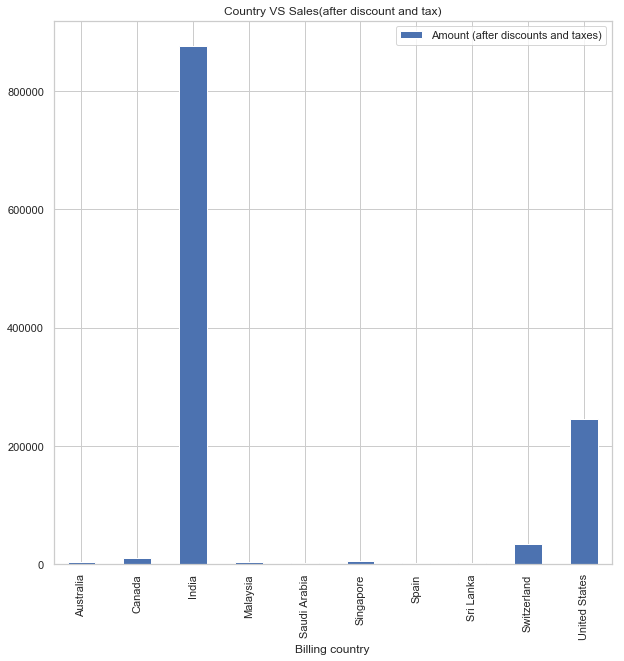

In [87]:
plt.figure(figsize=(10,10))
df_region = data1[["Billing country", "Amount (after discounts and taxes)"]]
df_region.groupby("Billing country").sum().plot(kind="bar",figsize=(10,10)) 
plt.title('Country VS Sales(after discount and tax)')

##### India is the most revenue generating country, followed by US. Whereas, in Switzerland, Canada, Aus, Singapore if promotion is done similar to the U.S, we can see an increase in figures.. 

<Figure size 1440x720 with 0 Axes>

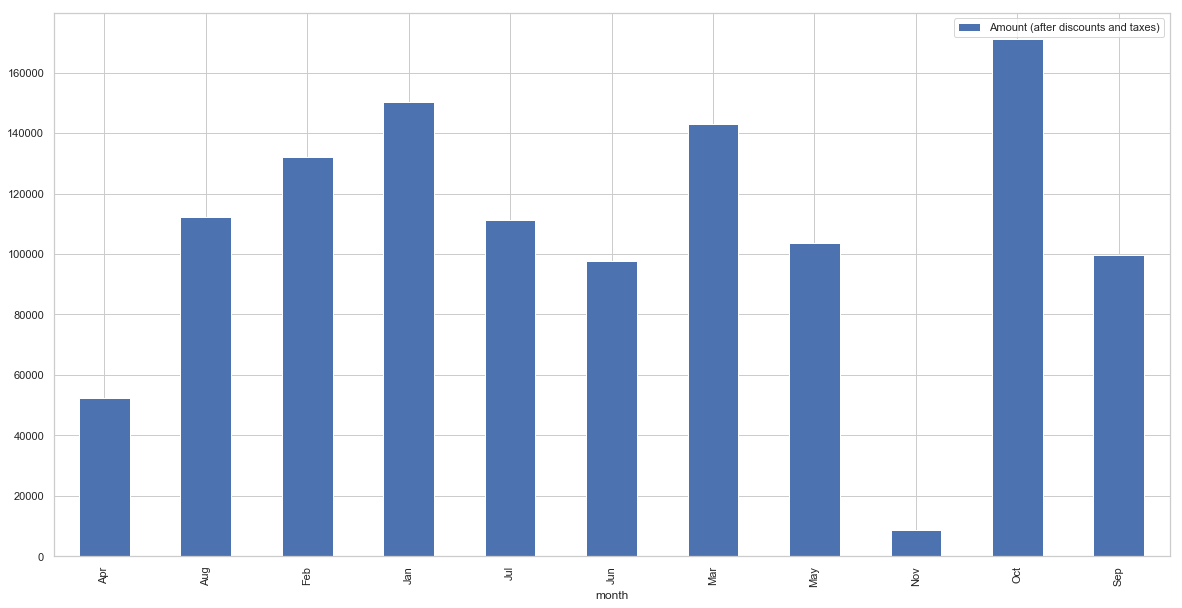

In [51]:
# plotting sales made by each month 
plt.figure(figsize=(20,10))
df_region = data1[["month", "Amount (after discounts and taxes)"]]
d=df_region.groupby("month").sum()

d.plot(kind="bar",figsize=(20,10),sort_columns=True) 
plt.show()

In [52]:
# Oct the sales peak because of Diwali followed by a dip in the next month which is Nov(post diwali purchase where people decide to cut back on spends)
# Peaking in Jan could be mostly due to New year. 

<Figure size 1440x720 with 0 Axes>

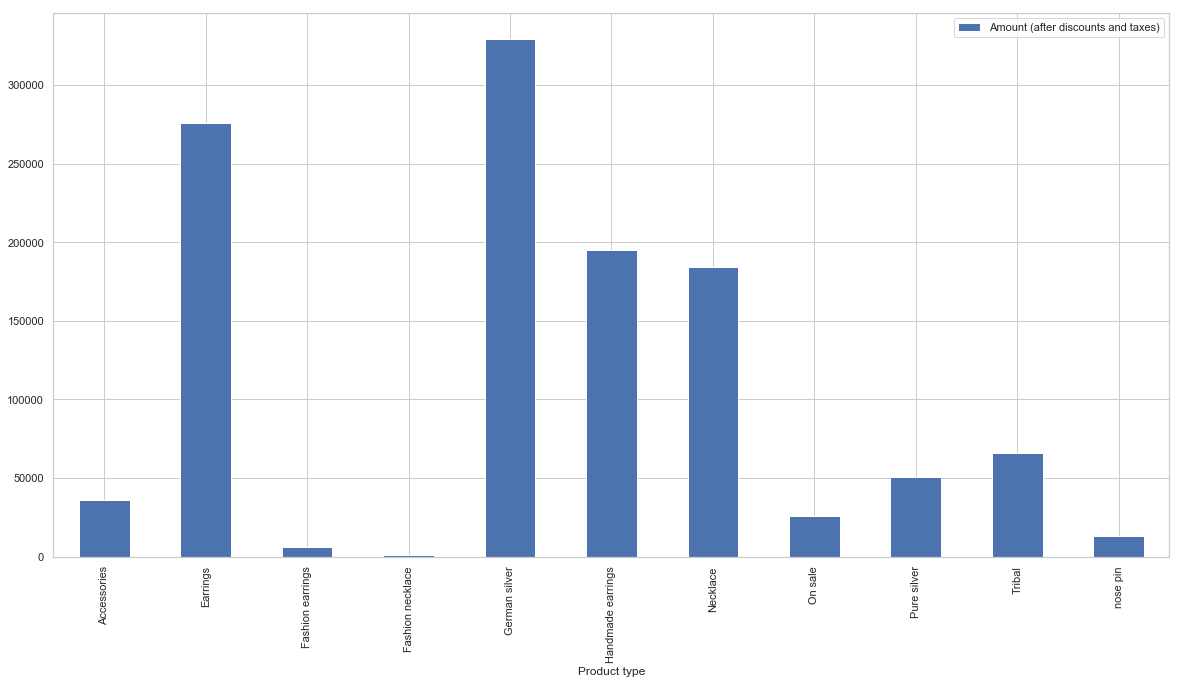

In [53]:
# plotting sales made by each product type 
plt.figure(figsize=(20,10))
df_region = data1[["Product type", "Amount (after discounts and taxes)"]]
d=df_region.groupby("Product type").sum()
d.plot(kind="bar",figsize=(20,10)) 
plt.show()

##### We see the german silver has fetched the maximum revenue and Fashion earrings are the least fetching product types

***
***

## Lets perform MBA on our data

In [54]:
data1.head()

,Date,Order,Transaction type,Sale type,Product type,Net quantity,Amount (after discounts and taxes),Billing country,month
0,2018-01-01,#HOJ1566,product,order,nose pin,1,75.0,India,Jan
1,2018-01-01,#HOJ1566,product,order,Tribal,1,525.0,India,Jan
3,2018-01-01,#HOJ1566,product,order,nose pin,1,75.0,India,Jan
4,2018-01-01,#HOJ1566,product,order,German silver,1,350.0,India,Jan
5,2018-01-01,#HOJ1566,product,order,nose pin,1,75.0,India,Jan


In [55]:
mba=data1[['Date','Order','Product type','Net quantity']]

In [56]:
mba.head()

,Date,Order,Product type,Net quantity
0,2018-01-01,#HOJ1566,nose pin,1
1,2018-01-01,#HOJ1566,Tribal,1
3,2018-01-01,#HOJ1566,nose pin,1
4,2018-01-01,#HOJ1566,German silver,1
5,2018-01-01,#HOJ1566,nose pin,1


In [57]:
mba['Net quantity'].unique()

array([1, 2, 3, 6], dtype=int64)

In [58]:
grouped = mba.groupby(['Order','Product type']).size().reset_index(name='Net quantity')
mba1 =  grouped.sort_values('Order', ascending=False)

mba1.head(10)

# we have grouped based on the ORDER ID & product type.

,Order,Product type,Net quantity
1002,#HOJ2336,Necklace,1
1001,#HOJ2335,On sale,1
1000,#HOJ2335,German silver,2
999,#HOJ2334,Tribal,3
998,#HOJ2333,Necklace,1
997,#HOJ2332,German silver,1
996,#HOJ2331,On sale,1
995,#HOJ2331,Earrings,1
994,#HOJ2330,German silver,1
993,#HOJ2329,Earrings,1


In [59]:
basket = (mba1.groupby(['Order', 'Product type'])['Net quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order'))
basket

Product type,Accessories,Earrings,Fashion earrings,Fashion necklace,German silver,Handmade earrings,Necklace,On sale,Pure silver,Tribal,nose pin
Order,,,,,,,,,,,
#HOJ1566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
#HOJ1567,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
#HOJ1568,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
#HOJ1569,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
#HOJ1570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
#HOJ1571,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
#HOJ1572,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#HOJ1573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
#HOJ1574,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [60]:

# The encoding function
# encoding function will convert all the postive values into 1 and negative values into 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
# apply the function here for the dataset    
basket_sets = basket.applymap(encode_units)

In [88]:
basket_sets

Product type,Accessories,Earrings,Fashion earrings,Fashion necklace,German silver,Handmade earrings,Necklace,On sale,Pure silver,Tribal,nose pin
Order,,,,,,,,,,,
#HOJ1566,0,0,0,0,1,0,0,0,0,1,1
#HOJ1567,0,0,0,0,0,0,1,0,0,0,0
#HOJ1568,0,0,0,0,0,0,1,0,0,1,0
#HOJ1569,0,0,0,0,0,1,0,0,0,0,0
#HOJ1570,0,0,0,0,0,1,0,0,0,0,0
#HOJ1571,0,0,0,0,0,0,1,0,0,0,0
#HOJ1572,0,1,0,0,0,0,0,0,0,0,0
#HOJ1573,0,0,0,0,0,0,0,1,0,0,0
#HOJ1574,0,0,0,0,0,1,0,0,0,0,0


In [85]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(Earrings, Tribal)",(German silver),0.013812,0.433702,0.011050,0.800000,1.844586,0.005059,2.831492
12,(nose pin),(German silver),0.063536,0.433702,0.041436,0.652174,1.503739,0.013881,1.628108
16,"(Earrings, Handmade earrings)",(German silver),0.042818,0.433702,0.020718,0.483871,1.115677,0.002148,1.097203
0,(Accessories),(German silver),0.052486,0.433702,0.023481,0.447368,1.031512,0.000717,1.024730
23,"(German silver, Necklace)",(Earrings),0.024862,0.295580,0.011050,0.444444,1.503634,0.003701,1.267956
18,"(German silver, Handmade earrings)",(Earrings),0.049724,0.295580,0.020718,0.416667,1.409657,0.006021,1.207577
11,(Tribal),(German silver),0.125691,0.433702,0.049724,0.395604,0.912158,-0.004788,0.936966
9,(On sale),(German silver),0.049724,0.433702,0.017956,0.361111,0.832626,-0.003609,0.886380
17,"(Earrings, German silver)",(Handmade earrings),0.067680,0.174033,0.020718,0.306122,1.758989,0.008940,1.190364
7,(On sale),(Earrings),0.049724,0.295580,0.015193,0.305556,1.033749,0.000496,1.014365


In [84]:
# Association rules to find the lift value
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift',ascending=False)
# higher lift, higher the association. 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,"(Earrings, Tribal)",(German silver),0.013812,0.433702,0.011050,0.800000,1.844586,0.005059,2.831492
23,(German silver),"(Earrings, Tribal)",0.433702,0.013812,0.011050,0.025478,1.844586,0.005059,1.011971
11,"(Earrings, German silver)",(Handmade earrings),0.067680,0.174033,0.020718,0.306122,1.758989,0.008940,1.190364
14,(Handmade earrings),"(Earrings, German silver)",0.174033,0.067680,0.020718,0.119048,1.758989,0.008940,1.058310
8,(nose pin),(Tribal),0.063536,0.125691,0.013812,0.217391,1.729575,0.005826,1.117173
9,(Tribal),(nose pin),0.125691,0.063536,0.013812,0.109890,1.729575,0.005826,1.052077
3,(Tribal),(Accessories),0.125691,0.052486,0.011050,0.087912,1.674957,0.004453,1.038840
2,(Accessories),(Tribal),0.052486,0.125691,0.011050,0.210526,1.674957,0.004453,1.107459
6,(nose pin),(German silver),0.063536,0.433702,0.041436,0.652174,1.503739,0.013881,1.628108
7,(German silver),(nose pin),0.433702,0.063536,0.041436,0.095541,1.503739,0.013881,1.035386


- (Earrings, Tribal) >> (German silver) <br>
- (Earrings, Tribal) << (German silver)

- We have sorted based on high lift value as we know, higher the lift greater the association. So for instance we can say, Chance of **(German silver)** being purchased is higher when **(Earrings, Tribal)** are purchased, considering the popularity of **(German Silver)**. So we can bundle them up to boost sales. 
- Same applies to **(Earrings, German silver) and (Handmade earrings)**	followed by few other combinations that could bring in improvement. 
- On the other hand, We might have to consider coming up with offers on bundling **(Necklace) & (Earrings, German silver)** to increase its sales. 



##### The above may require attention like offers and promotion to boost the sales.

***